**Online Alışveriş Mağazası Veri Seti Analizi**

Eldeki veriler kullanarak mağazanın satış oranları ve şekilleri, mağazayı kullanan satıcılar ve alıcılar hakkında veriler analiz edilmiştir.

In [2]:
import numpy as np
import pandas as pd

**Alışverişin en çok olduğu aylar**

<AxesSubplot: >

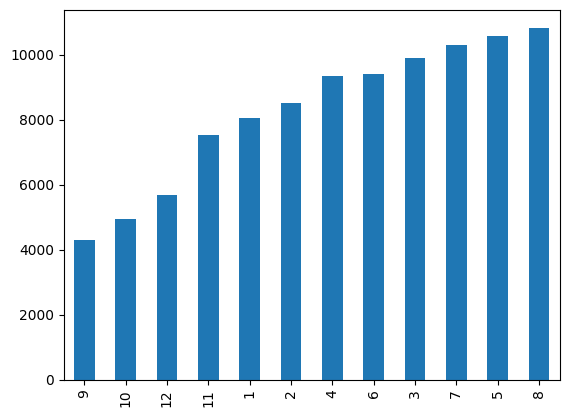

In [8]:
orders = pd.read_csv("orders_dataset.csv", engine='python')
orders['Month'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.month
orders['Month'].value_counts()
graphthis = orders['Month'].value_counts()

orders['Month'].value_counts(ascending=True).plot(kind='bar')

**Ortalama sipariş tutarı**

In [3]:
orderslisted = pd.read_csv("order_items_dataset.csv", engine='python')
avgorders = orderslisted

orderpricesavg = avgorders["price"].mean()
print(orderpricesavg)

120.65373901464716


**Site üzerinden hangi türde ödeme yapmanın mümkün olduğu ve ne kadar tercih edildikleri**

,payment_type
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


array([<AxesSubplot: ylabel='payment_type'>], dtype=object)

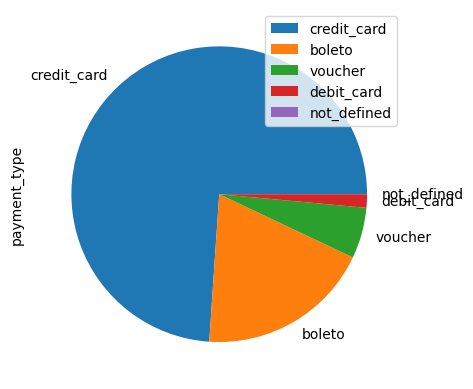

In [7]:
payments = pd.read_csv("order_payments_dataset.csv", engine='python')
paymenttype = payments

paymentordered = payments['payment_type'].value_counts()
paymentordereddata = paymentordered.to_frame()
display(paymentordereddata)
paymentordereddata.plot.pie(subplots=True)

**En çok hangi kategoride ürün satılmıştır?**

bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_category_name_english, dtype: int64

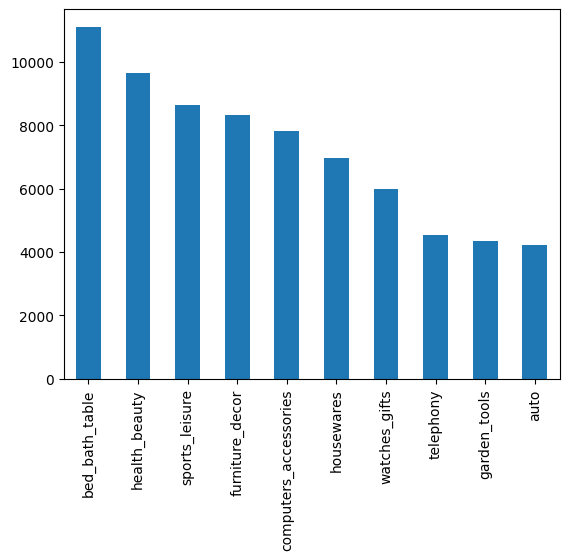

In [9]:
productslisted = pd.read_csv("products_dataset.csv", engine='python')
productdataset = productslisted

orderitemslisted = pd.read_csv("order_items_dataset.csv", engine='python')
ordereditemsset = orderitemslisted

itemstranslated = pd.read_csv("product_category_name_translation.csv", engine='python')
productstran = itemstranslated

alltogether = pd.merge(productdataset, ordereditemsset)
alltogetheren= pd.merge(alltogether, productstran)

mostten = alltogetheren['product_category_name_english'].value_counts()
mosttenshown=mostten.head(10)
display(mosttenshown)
plotmostten = mostten.head(10).plot.bar()


**Site üzerinden alışveriş yapan kullanıcıların çoğunlukta olduğu eyalet ve iller**

En çok alışveriş yapan eyaletler: 


,customer_state
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


En çok alışveriş yapılan şehirler: 


,customer_city
sao paulo,15540
campinas,1444
guarulhos,1189
sao bernardo do campo,938
santo andre,796
osasco,746
santos,713
sao jose dos campos,691
sorocaba,633
jundiai,565


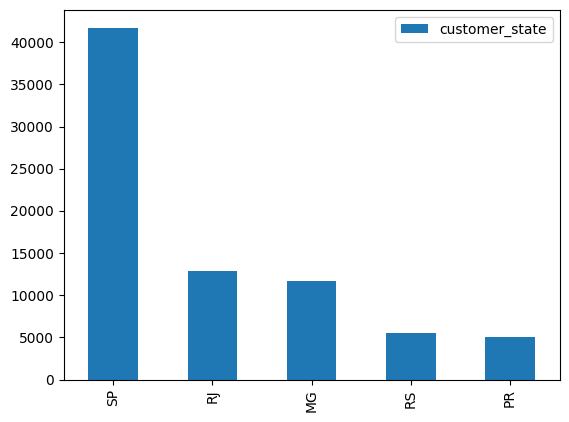

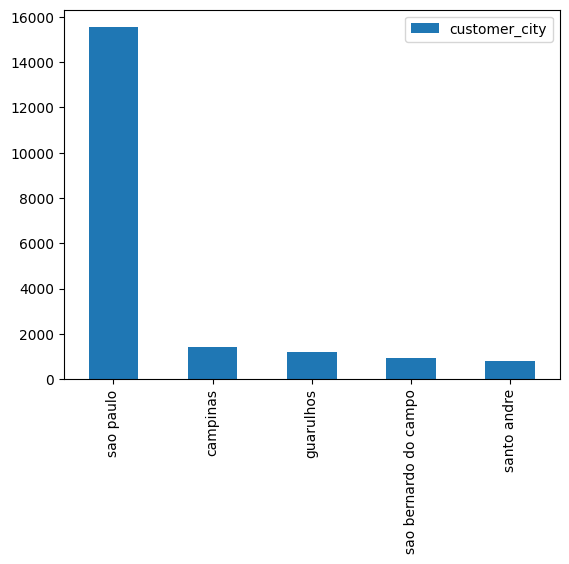

In [11]:
stateofc = pd.read_csv("customers_dataset.csv", engine='python')
stateofcustomer = stateofc

orderlist = stateofcustomer['customer_state'].value_counts()
mostorder = orderlist
#mostorder.to_frame
mostorder = pd.DataFrame(orderlist)
#print(tabulate(df, headers = 'keys', tablefmt = 'psql'))
print("En çok alışveriş yapan eyaletler: ")
display(mostorder.head(5))

plotmostfivest = mostorder.head(5).plot.bar()

newly= pd.concat([stateofcustomer['customer_state'], stateofcustomer['customer_city']], axis = 1, join='inner')
cities= newly.loc[newly['customer_state'] == 'SP']

citycounts = cities['customer_city'].value_counts()
mostordercity = pd.DataFrame(citycounts.head(20))
print("En çok alışveriş yapılan şehirler: ")
display(mostordercity)

plotmostfivesct = mostordercity.head(5).plot.bar()

**En çok satış yapan satıcılar hangi eyaletlerde ve şehirlerde?**

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_state, dtype: int64

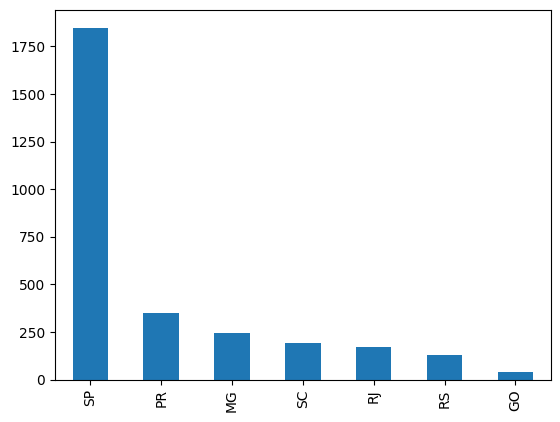

In [18]:
orderitems = pd.read_csv("order_items_dataset.csv", engine='python')
#orderitems['Seller ID'] = pd.(orders['order_purchase_timestamp']).dt.date
sellersidetc = pd.read_csv("sellers_dataset.csv", engine='python')
selleralldata= pd.merge(orderitems, sellersidetc)

neededsellerdata = selleralldata[['seller_id', 'seller_city', 'seller_state']]
realsellerdata= neededsellerdata.drop_duplicates('seller_id')

stateofseller = realsellerdata['seller_state'].value_counts()
display(stateofseller.head(10))
plotmostfivest = stateofseller.head(7).plot.bar()


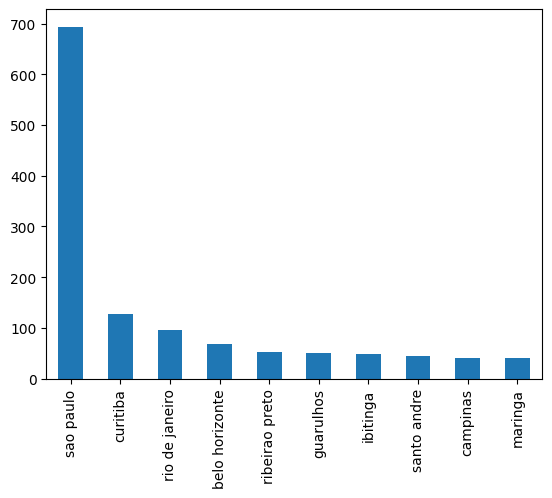

In [22]:
cityofseller = realsellerdata['seller_city'].value_counts()
cityofseller.head(10)
plotmostfivest = cityofseller.head(10).plot.bar()

In [23]:
orderitemsvalue= orderitems['seller_id'].value_counts()
bestsellers= orderitemsvalue.head(5)
print("En çok satış yapan satıcılar:\n")
display(bestsellers)

En çok satış yapan satıcılar:



6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: seller_id, dtype: int64

In [25]:
a=realsellerdata[(realsellerdata.values.ravel() == '6560211a19b47992c3666cc44a7e94c0').reshape(realsellerdata.shape).any(1)]
b=realsellerdata[(realsellerdata.values.ravel() == '4a3ca9315b744ce9f8e9374361493884').reshape(realsellerdata.shape).any(1)]
c=realsellerdata[(realsellerdata.values.ravel() == '1f50f920176fa81dab994f9023523100').reshape(realsellerdata.shape).any(1)]
d=realsellerdata[(realsellerdata.values.ravel() == 'cc419e0650a3c5ba77189a1882b7556a').reshape(realsellerdata.shape).any(1)]
e=realsellerdata[(realsellerdata.values.ravel() == 'da8622b14eb17ae2831f4ac5b9dab84a').reshape(realsellerdata.shape).any(1)]

wheretheyare = [a, b, c, d, e]
print(wheretheyare)

[                              seller_id seller_city seller_state
10363  6560211a19b47992c3666cc44a7e94c0   sao paulo           SP,                              seller_id seller_city seller_state
2666  4a3ca9315b744ce9f8e9374361493884    ibitinga           SP,                              seller_id            seller_city seller_state
4653  1f50f920176fa81dab994f9023523100  sao jose do rio preto           SP,                             seller_id  seller_city seller_state
872  cc419e0650a3c5ba77189a1882b7556a  santo andre           SP,                               seller_id seller_city seller_state
59020  da8622b14eb17ae2831f4ac5b9dab84a  piracicaba           SP]
